In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb

In [76]:
import sklearn

from sklearn import datasets, model_selection, tree, dummy, metrics, linear_model, naive_bayes, ensemble

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [3]:
import seaborn as sns
sns.set()

In [4]:
digits = datasets.load_digits()

In [5]:
X = digits.data
y = digits.target 

In [6]:
X.shape, y.shape

((1797, 64), (1797,))

In [7]:
def plot_pixel_distribution(X):
        
    fig, axis = plt.subplots(8, 8, figsize=(20, 20))

    for feature in range(64):
        ax = sns.distplot(X[:, feature], bins=np.arange(17),
                          kde=False, norm_hist=True,
                          hist_kws={'rwidth':0.8, 'align':'left'},
                          ax=axis.ravel()[feature])
        
#         ax.set_title('pixel {}'.format(feature), position=(0.5, 0.8))
#         ax.set_yticks([])
        #     plt.tight_layout()

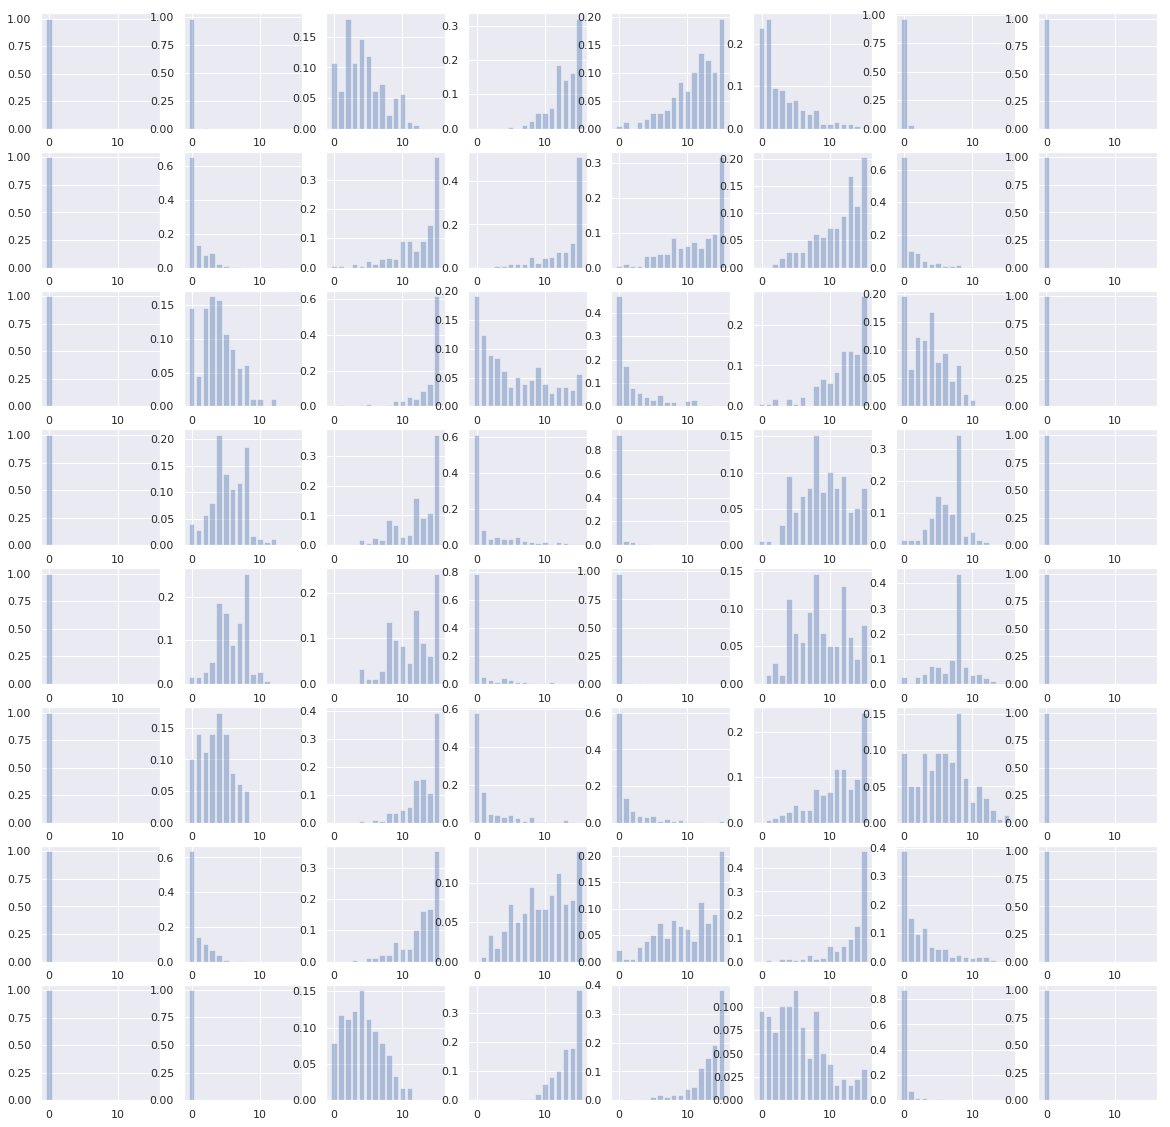

In [8]:
plot_pixel_distribution(X[y==0])

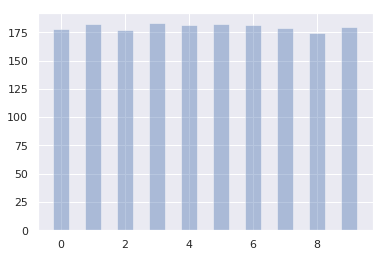

In [9]:
sns.distplot(y, bins=np.arange(11), kde=False, hist_kws={'rwidth':0.5, 'align':'left'})

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, shuffle=False)

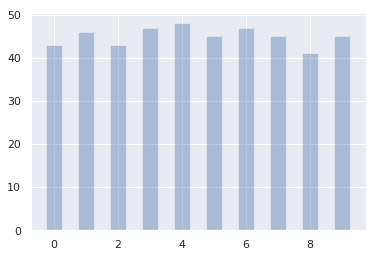

In [25]:
sns.distplot(y_test, bins=np.arange(11), kde=False, hist_kws={'rwidth':0.5, 'align':'left'})

In [32]:
sklearn.metrics.pairwise.euclidean_distances(X[1:2], X).shape

(1, 1797)

In [67]:
def knn_predict(X, X_train=X_train, y_train=y_train, distance_fnc=sklearn.metrics.pairwise.euclidean_distances):
    
    distances = distance_fnc(X_train, X)
    mindist_ind = distances.argmin(axis=0)
    
    return y_train[mindist_ind]
    

In [74]:
test_error = 1 - metrics.accuracy_score(y_test, knn_predict(X_test))
print(test_error)

0.0377777777777778


In [90]:
with open('answer1.txt', 'w') as fout:
    fout.write(str(test_error))

In [91]:
cat answer1.txt

0.0377777777777778

In [77]:
rf_clf = ensemble.RandomForestClassifier(n_estimators = 1000)

In [78]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
rf_clf.score(X_train, y_train)

1.0

In [88]:
rf_clf.score(X_test, y_test)

0.9311111111111111

In [86]:
with open('answer2.txt', 'w') as fout:
    fout.write(str(1 - rf_clf.score(X_test, y_test)))

In [87]:
cat answer2.txt

0.06888888888888889